<table style="width: 100%">
    <tr style="background: #ffffff">
        <td style="padding-top:25px; width: 180px">
            <img src="https://mci.edu/templates/mci/images/logo.svg" alt="Logo">
        </td>
        <td style="width: 100%">
            <div style="width: 100%; text-align:right"><font style="font-size:38px"><b>Softwaredesign</b></font></div>
            <div style="padding-top:0px; width: 100%; text-align:right"><font size="4"><b>WS 2023</b></font></div>
        </td>
    </tr>
</table>

---

# Word Frequency Analysis

Ziel dieser Aufgabe soll es sein eine Analyse der Worthäufigkeit in einem Text durchzuführen. Dies kann beispielsweise genutzt werden um ein erstes Indiz dafür zu bekommen ob zwei Texte von der selben Person geschrieben wurden.

## Aufgabenstellung
Implementieren Sie eine Klasse `WordCounter`, welche einen Pfad zu einer Textdatei als Konstruktor-Parameter erhält.  
Die Klasse soll eine Methode `count_words(...)` bereitstellen, welche mittels Generator durch die Textdatei iteriert und für jedes Wort die Anzahl der Vorkommen in einem Dictionary speichert.  
Weiters soll die Klasse noch folgende Methoden für die Ausgabe der Daten bereitstellen:
- `get_all_word_freqs(...)` gibt eine Liste aller Wörter und deren Anzahl als `Tupel` zurück. Diese Liste soll nach Häufigkeit absteigend sortiert sein.
- `get_top_n_words(...)` gibt eine absteigend sortierte Liste der `n` häufigsten Wörter und deren Häufigkeit als `Tupel` zurück.
- `get_bottom_n_words(...)` gibt eine aufsteigend sortierte Liste der `n` seltensten Wörter und deren Häufigkeit als `Tupel` zurück.
- `get_all_words(...)` gibt eine absteigend sortierte Liste aller Worte zurück.
- `get_all_counts(...)` gibt eine absteigend sortierte Liste aller Anzahlen zurück.
- `plot(...)` ermöglicht es, dass sich Instanzen der `WordCounter`-Klasse selbst plotten. Dies kann beispielsweise implementiert werden, indem die Methode eine `matplotlib.axes.Axes` entgegen nimmt.

Die genaue Implementierung der Methoden ist Ihnen überlassen, es wird jedoch empfohlen die Methoden `get_all_words(...)` & `get_all_counts(...)` bzw. `get_top_n_words(...)` & `get_bottom_n_words(...)` mittels `get_all_word_freqs(...)` zu implementieren.  
Besondere Rücksicht muss auf die Groß- und Kleinschreibung von Wörtern und etwaige Satzzeichen genommen werden.

Bestimmen Sie die Worthäufigkeit für die im nächsten Punkt aufgeführten Texte und geben Sie die Ergebnisse aus.  
Anschließend sollten Sie diese Ergebnisse in Form von z.B. Historgrammen visualisieren. Überlegen Sie sich hierbei wie eine sinnvolle Darstellung aussehen könnte.

## Datensätze
Für diese Beispiel werden Werke von Shakespeare verwendet, im Konkren sind das *The Tragedy of Macbeth*, *The Tragedy of Romeo and Juliet* und *The Tragedy of Hamlet* in englischer Sprache. Die Texte sind als `*.txt`-Datei in der Aufgabenstellung enthalten.  
Diese stammen aus Project Gutenberg, und wurden aus der Datei https://ocw.mit.edu/ans7870/6/6.006/s08/lecturenotes/files/t8.shakespeare.txt extrahiert.

Suchen Sie sich auch noch einen beliebigen Text in englischer Sprache, der nach den Werken von Shakespeare entstanden ist, und führen Sie die Analyse auch für diesen durch.

---
## Beginn der Setup-Code-Blöcke

In [1]:
import matplotlib.pyplot as plt

---
## Beispielimplementierung für einen Generator
Sie können folgende Implementierung als Ausgangspunkt für Ihren Generator verwenden.  
Sie könnten diesen Generator aber z.B. auch direkt als Parameter an den Klassen-Konstruktor übergeben und innerhalb der Klasse nutzen.

Der Generator `read_string_by_line(...)` eignet sich dazu Ihre Implementierung zu testen an einem String zu testen, ohne dass Sie sich eine Textdatei erstellen müssen.

In [12]:
def read_file_by_line(file):
    """Generator to read a file object line by line"""
    with open(file, 'r') as f:
        while True:
            data = f.readline()
            if not data:
                break
            yield data

def read_string_by_line(string):
    """
    Generator to read a string line by line. This is useful for testing, because no file is needed.
    """
    for line in string.split('\n'):
        yield line

---
## Implementierung `WordCounter`

In [13]:
import matplotlib.pyplot as plt
from collections import defaultdict

class WordCounter:
   
    def __init__(self, source, generator):
        self.word_counts = defaultdict(int)
        self.source = source
        self.generator = generator

    def count_words(self):
    
        for line in self.generator(self.source):
            cleaned_line = self.clean_line(line)
            words = cleaned_line.split()
            for word in words:
                self.word_counts[word] += 1  
    def clean_line(self, line):
      
        line = line.lower().strip()  
        punctuation = ".,!?;:\"'()[]{}-"
        for char in punctuation:
            line = line.replace(char, "") 
        return line

    def get_sorted_word_freqs(self, reverse=True):
        return sorted(self.word_counts.items(), key=lambda x: x[1], reverse=reverse)

    def get_top_n(self, n):
        return self.get_sorted_word_freqs()[:n]

    def get_bottom_n(self, n):
        return self.get_sorted_word_freqs(reverse=False)[:n]

    def get_all_words(self):
        return [word for word, _ in self.get_sorted_word_freqs()]

    def get_all_counts(self):
       return [count for _, count in self.get_sorted_word_freqs()]

    def plot_word_frequencies(self, axis, start, end):
        word_freqs = self.get_sorted_word_freqs()[start:end]
        words, counts = zip(*word_freqs)
        axis.bar(words, counts)
        axis.set_xticklabels(words, rotation=45, ha="right")
        axis.set_title("Häufigkeit der Wörter")
        axis.set_xlabel("Wörter")
        axis.set_ylabel("Häufigkeit")



---
## Musterlösung für eine Teststring

In [21]:
text = "Das ist ein Teststring\
               mit mehreren Zeilen.\
               Aber er enthält wenig sinnvollen Inhalt in diesen mehreren Zeilen.\
               Trotz des wenig sinnvolen Inhalt sind diese Zeilen hilfreich zum Testen."

def split_text_into_lines(text):
    for line in text.split('\n'):
        yield line.strip()

word_counter = WordCounter(text, split_text_into_lines)
word_counter.count_words()

print("Alle Wortfrequenzen:")
print(word_counter.get_sorted_word_freqs())

print("\nTop 3 häufigste Wörter:")
print(word_counter.get_top_n(3))

print("\nTop 3 seltenste Wörter:")
print(word_counter.get_bottom_n(3))


Alle Wortfrequenzen:
[('zeilen', 3), ('mehreren', 2), ('wenig', 2), ('inhalt', 2), ('das', 1), ('ist', 1), ('ein', 1), ('teststring', 1), ('mit', 1), ('aber', 1), ('er', 1), ('enthält', 1), ('sinnvollen', 1), ('in', 1), ('diesen', 1), ('trotz', 1), ('des', 1), ('sinnvolen', 1), ('sind', 1), ('diese', 1), ('hilfreich', 1), ('zum', 1), ('testen', 1)]

Top 3 häufigste Wörter:
[('zeilen', 3), ('mehreren', 2), ('wenig', 2)]

Top 3 seltenste Wörter:
[('das', 1), ('ist', 1), ('ein', 1)]


---
## Anwendung der WordCounter-Klasse auf die Datensätze
Die hier angegebenen Musterlösungen müssen nicht zwingend mit Ihrer Implementierung übereinstimmen. Dies kommt darauf an wie Sie die Bereinigung der originalen Textdateien durchführen.  
Sie sollte aber als Möglichkeit zur Überprüfung dienen.

### "The Tragedy of Macbeth"
Benutzen Sie hier ihre `WordCounter`-Klasse um die Worthäufigkeit für das Werk *The Tragedy of Macbeth* zu bestimmen.

In [28]:
def read_file_by_line(file):
    with open(file, 'r', encoding='utf-8') as f:
        while True:
            line = f.readline()
            if not line:
                break
            yield line

Geben Sie hier den Output in einzlenen Listen aus.

In [30]:
macbeth_counter = WordCounter("the_tragedy_of_macbeth.txt", read_file_by_line)
macbeth_counter.count_words()
print(macbeth_counter.get_top_n_words(10))
print(macbeth_counter.get_bottom_n_words(10))

AttributeError: 'WordCounter' object has no attribute 'get_top_n_words'

### "The Tragedy of Rome and Juliet"
Benutzen Sie hier ihre `WordCounter`-Klasse um die Worthäufigkeit für das Werk *The Tragedy of Romeo and Juliet* zu bestimmen.

### Visualisierung der Ergebnisse
Visualisieren Sie die Ergebnisse der Worthäufigkeit für die drei Werke von Shakespeare.  
Hier ist eine sehr simple, beispielhafte Visualisierung für zwei der Werke gegeben. Dies soll von Ihnen nicht nachgebaut werden, sondern nur als Anregung dienen um sich eine bessere/sinnvollere Visualisierung zu überlegen.

### Visualisierung der Ergebnisse
Visualisieren Sie die Ergebnisse der Worthäufigkeit für die drei Werke von Shakespeare.  
Hier ist eine sehr simple, beispielhafte Visualisierung für zwei der Werke gegeben. Dies soll von Ihnen nicht nachgebaut werden, sondern nur als Anregung dienen um sich eine bessere/sinnvollere Visualisierung zu überlegen.

In [ ]:
# Lösung einfügen
def read_file_by_line(file):
    with open(file, 'r', encoding='utf-8') as f:
        while True:
            line = f.readline()
            if not line:
                break
            yield line

Geben Sie hier den Output in einzlenen Listen aus.

In [35]:
# Lösung einfügen
romeo_and_juliet_counter = WordCounter("the_tragedy_of_romeo_and_juliet.txt", read_file_by_line)
romeo_and_juliet_counter.count_words()
print(romeo_and_juliet_counter.get_top_n_words(10))
print(romeo_and_juliet_counter.get_bottom_n_words(10))

AttributeError: 'WordCounter' object has no attribute 'get_top_n_words'

### "The Tragedy of Hamlet"
Benutzen Sie hier ihre `WordCounter`-Klasse um die Worthäufigkeit für das Werk *The Tragedy of Hamlet* zu bestimmen.

In [33]:
# Lösung einfügen
def read_file_by_line(file):
    with open(file, 'r', encoding='utf-8') as f:
        while True:
            line = f.readline()
            if not line:
                break
            yield line

Geben Sie hier den Output in einzlenen Listen aus.

In [34]:
# Lösung einfügen
ham_counter = WordCounter("the_tragedy_of_hamlet.txt", read_file_by_line)
ham_counter.count_words()
print(ham_counter.get_top_n_words(10))
print(ham_counter.get_bottom_n_words(10))

AttributeError: 'WordCounter' object has no attribute 'get_top_n_words'

### Visualisierung der Ergebnisse
Visualisieren Sie die Ergebnisse der Worthäufigkeit für die drei Werke von Shakespeare.  
Hier ist eine sehr simple, beispielhafte Visualisierung für zwei der Werke gegeben. Dies soll von Ihnen nicht nachgebaut werden, sondern nur als Anregung dienen um sich eine bessere/sinnvollere Visualisierung zu überlegen.

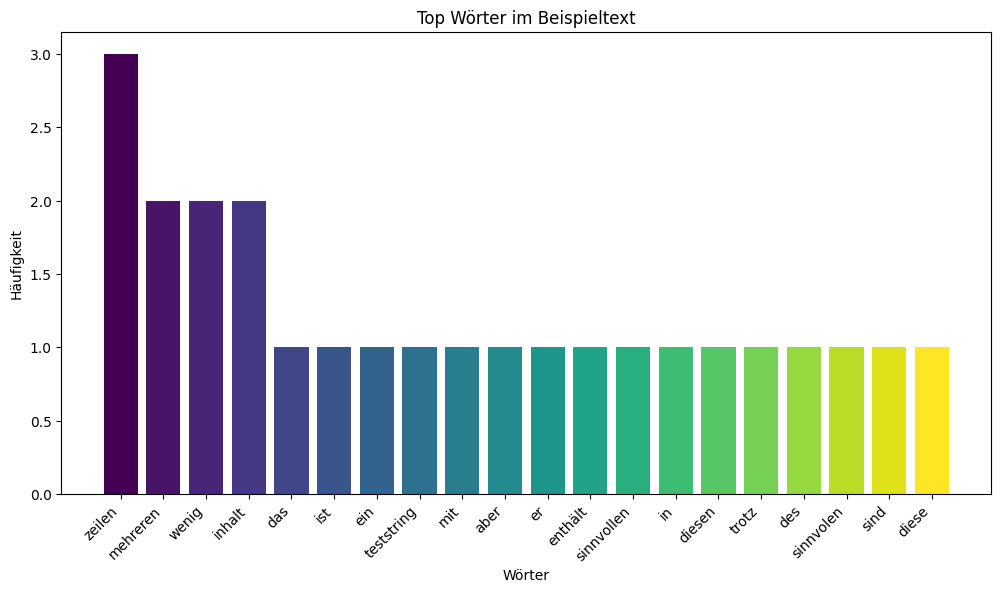

In [32]:
import numpy as np
import matplotlib.pyplot as plt

def plot_colored_bar_chart(word_counter, title, top_n=20):
    word_freqs = word_counter.get_top_n(top_n)
    words, counts = zip(*word_freqs)
    colors = plt.cm.viridis(np.linspace(0, 1, len(counts)))
    
    plt.figure(figsize=(12, 6))
    plt.bar(words, counts, color=colors)
    plt.xticks(rotation=45, ha="right")
    plt.title(title)
    plt.xlabel("Wörter")
    plt.ylabel("Häufigkeit")
    plt.show()

# Beispielhafte Verwendung
plot_colored_bar_chart(word_counter, "Top Wörter im Beispieltext")

